# 测试算法

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [222]:
iris = datasets.load_iris()
X = iris.data # 特征矩阵
y = iris.target # 结果标签对应的向量

## train_test_split

In [223]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """将数据X和y按照test_ratio分割成X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, "test_ratio must be valid"
    
    if seed:
        np.random.seed(seed)
        
    shuffle_indexes = np.random.permutation(len(X))
    test_size = int(len(X) * test_ratio) # 测试数据集的大小
    test_indexes = shuffle_indexes[:test_size]
    train_indexes = shuffle_indexes[test_size:]
    
    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    return X_train, X_test, y_train, y_test

In [224]:
from ILML.model_selection import train_test_split
from ILML.kNN import KNNClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y)

my_kNN_clif = KNNClassifier(k=3)
my_kNN_clif.fit(X_train, y_train)
y_predict = my_kNN_clif.predict(X_test)

print(y_predict)
print(y_test)

[1 1 1 1 1 0 2 1 2 2 1 0 2 2 0 0 2 1 0 0 2 0 2 1 0 0 0 2 0 0]
[1 1 1 2 1 0 2 1 2 2 1 0 2 2 0 0 2 2 0 0 2 0 2 1 0 0 0 2 0 0]


In [225]:
sum(y_predict == y_test) / len(y_test)

0.9333333333333333

## sklearn中的train_test_split

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
print(X_train.shape)

(120, 4)


# 测试精度

In [228]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [243]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [232]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

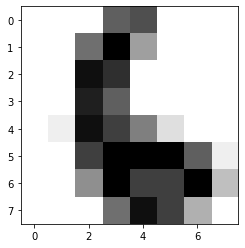

In [233]:
some_digit = X[66]
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()

In [234]:
from ILML.model_selection import train_test_split
from ILML.kNN import KNNClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2)
my_kNN_clif = KNNClassifier(k=3)
my_kNN_clif.fit(X_train, y_train)
y_predict = my_kNN_clif.predict(X_test)
sum(y_predict == y_test) / len(y_test)

1.0

In [235]:
from ILML.metrics import accuracy_score # 将上面的封装成一个函数

In [236]:
accuracy_score(y_test, y_predict)

1.0

## scikit-learn中的accuracy_score

In [237]:
# 对数据进行分割, 打乱
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [238]:
# 使用kNN, 获取预测值
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)

In [240]:
# 计算精度
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9888888888888889

In [241]:
knn_clf.score(X_test, y_test)

0.9888888888888889